In [9]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('log_0808_train_1.csv')
df = df.drop('Unnamed: 0',axis=1)
epsilon_ = df['Epsilon'] < 1
df_ = df[epsilon_].reset_index(drop=True,inplace=False)

In [15]:
df_

,Episode,Time,Final step,Score,Epsilon,Min_loss,avg_loss
0,0,0.405,81,4344,0.999,NaN,0.010576
1,1,0.405,81,4807,0.999,NaN,0.012388
2,2,0.405,81,5026,0.999,NaN,0.011219
3,3,0.405,81,5155,0.999,NaN,0.010610
4,4,0.405,81,3949,0.999,NaN,0.010623
...,...,...,...,...,...,...,...
995,995,0.405,81,4121,0.010,NaN,0.000007
996,996,0.405,81,4089,0.010,NaN,0.000006
997,997,0.405,81,4177,0.010,NaN,0.000007
998,998,0.405,81,4121,0.010,NaN,0.000007


In [16]:
x=range(int(len(df_['Episode'])))
y=df_['Epsilon']
y2=df_['Score']
y3=df_['avg_loss']

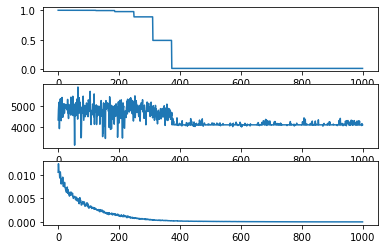

In [17]:
plt.subplot(311)
plt.plot(x,y)
plt.subplot(312)
plt.plot(x,y2)
plt.subplot(313)
plt.plot(x,y3)
plt.show()

In [39]:
#!/usr/bin/env python
# coding: utf-8

# In[10]:


import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
import numpy as np

class DQN: 
    def __init__(self,queue,cycle): 
        self.input = queue #agent는 queue 1개를 담당하지만 모든 queue의 state를 고려, 해당 큐에 몇 개의 flow가 대기중인지? or 몇 byte?
        self.output = 2**cycle #available action, 2^몇 개의 slot을 한 사이클로 정할것인지(cycle)
        self.learning_rate = 0.0001
        self.loss_history = []
        self.model = self.create_model() #현재 state에 대한 model
        self.target_model = self.create_model() #next state에 대한 model

    # create the neural network to train the q function 
    def create_model(self): 
        model = Sequential()
        model.add(Dense(24, input_dim= self.input, activation= 'relu')) 
        model.add(Dense(48, activation= 'relu'))
        model.add(Dense(24, activation= 'relu'))
        model.add(Dense(self.output)) #allowed action 
        model.compile(loss= 'mean_squared_error', optimizer= Adam(lr= self.learning_rate)) #optimizer의 learning rate 주의
        return model 
    
    def train(self, x, y, sample_weight=None, epochs=1, verbose=0):  # x is the input to the network and y is the output
        loss=[]
        history=self.model.fit(x, y, batch_size=len(x), sample_weight=sample_weight, epochs=epochs, verbose=verbose)
        loss.append(history.history['loss'][0]) # loss 기록
        return min(loss)
        
    def test(self,weight_file):
        self.model.load_weights(weight_file)
    
    def predict_one(self, state, target=False):
        return self.predict(np.array(state).reshape(1,self.input), target=target).flatten()

    def predict(self, state, target=False):
        if target:  # get prediction from target network
            return self.target_model.predict(state)
        else:  # get prediction from local network
            return self.model.predict(state)
    
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # save our model 
    def save_model(self, filename):
        self.model.save(filename)



In [67]:
from tensorflow import keras

ag1_be = keras.models.load_model("agent17.900466698629316e-07.h5")
ag2_cc = keras.models.load_model("agent27.900466698629316e-07.h5")
ag3_vd = keras.models.load_model("agent37.900466698629316e-07.h5")
ag4_ad = keras.models.load_model("agent47.900466698629316e-07.h5")

In [68]:
state=np.array([0,0,0,100]).reshape(-1,4)

In [69]:
a = format(np.argmax(ag1_be.predict(state)),'0'+str(10)+'b')
b = format(np.argmax(ag2_cc.predict(state)),'0'+str(10)+'b')
c = format(np.argmax(ag3_vd.predict(state)),'0'+str(10)+'b')
d = format(np.argmax(ag4_ad.predict(state)),'0'+str(10)+'b')


In [70]:
print (a  , b  , c  , d )

0100000001 1111101011 1111011001 1100011100
